In [70]:
from graphviz import Source
from networkx.drawing.nx_agraph import to_agraph
from networkx.readwrite.gpickle import read_gpickle
import networkx as nx
import pandas as pd 

In [10]:
def recursive_newick(tree, node, count):
    successors = list(tree.successors(node))
    if len(successors) == 0:
        cell_id = node
        return f'{cell_id}:{count}'
    elif len(successors) == 1:
        count += 1
        return recursive_newick(tree, successors[0], count)
    else:
        children = []
        for child in successors:
            child_repr = recursive_newick(tree, child, 1)
            children.append(child_repr)
        return '(' + ','.join(children) + f'):{count}'
             

In [11]:
tree_filename = f'../../mt-SCITE_output/YFV2001/0.0556/0.0556_map0.gv'

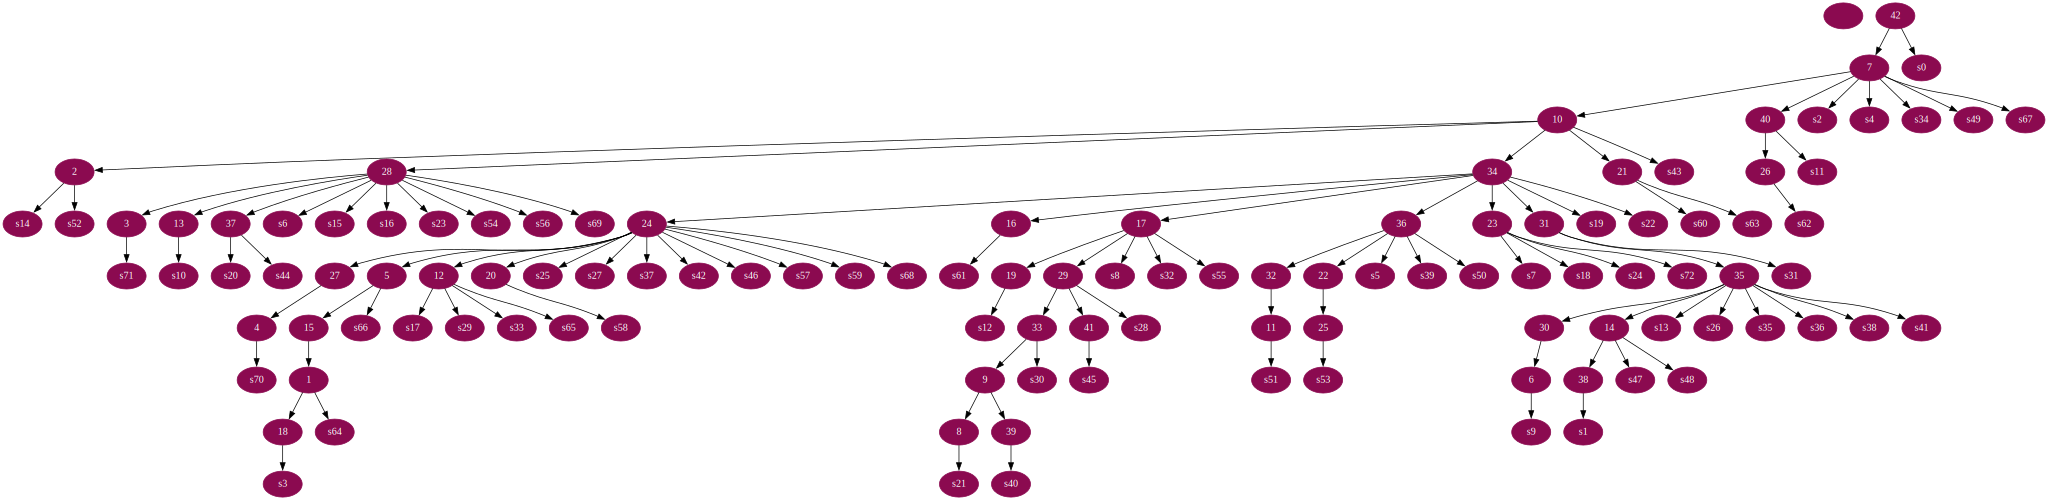

In [12]:
tree = nx.drawing.nx_pydot.read_dot(tree_filename)

from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
g = to_agraph(tree)

g = to_agraph(tree)
display(Source(g))

In [13]:
newick_tree = '(' + recursive_newick(tree, '6', 1) + ');'

In [14]:
newick_tree

'(s9:2);'

In [16]:
'(' + recursive_newick(tree, '42', 1) + ');'

'(((((s14:1,s52:1):1,(s60:1,s63:1):1,(s71:2,s10:2,(s20:1,s44:1):1,s6:1,s15:1,s16:1,s23:1,s54:1,s56:1,s69:1):1,(s61:2,(s12:2,(((s21:2,s40:2):1,s30:1):1,s45:2,s28:1):1,s8:1,s32:1,s55:1):1,(s7:1,s18:1,s24:1,s72:1):1,(((s3:2,s64:1):2,s66:1):1,(s17:1,s29:1,s33:1,s65:1):1,s58:2,s70:3,s25:1,s27:1,s37:1,s42:1,s46:1,s57:1,s59:1,s68:1):1,(((s1:2,s47:1,s48:1):1,s9:3,s13:1,s26:1,s35:1,s36:1,s38:1,s41:1):1,s31:1):1,(s53:3,s51:3,s5:1,s39:1,s50:1):1,s19:1,s22:1):1,s43:1):1,(s62:2,s11:1):1,s2:1,s4:1,s34:1,s49:1,s67:1):1,s0:1):1);'

In [20]:
newick_filename = '../../../mt-SCITE/mt-SCITE_output/Simulations/ground_truth/tree5_map0_from_gv.newick'
with open(newick_filename, 'w') as f:
    f.write(newick_tree)

In [15]:
tree

In [17]:
tree

In [18]:
nx.to_numpy_array(tree)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
df = nx.to_pandas_adjacency(tree)

In [47]:
df = df.loc[df.index[1:], df.columns[1:]]

In [53]:
df.loc[df['s11'] > 0]

,15,1,10,2,28,3,27,4,24,5,...,s5,s39,s50,s20,s44,s1,s40,s11,s45,s0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
df

,15,1,10,2,28,3,27,4,24,5,...,s5,s39,s50,s20,s44,s1,s40,s11,s45,s0
15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#[x for x in df.columns if 's' not in x]

['15',
 '1',
 '10',
 '2',
 '28',
 '3',
 '27',
 '4',
 '24',
 '5',
 '30',
 '6',
 '42',
 '7',
 '9',
 '8',
 '33',
 '32',
 '11',
 '12',
 '13',
 '35',
 '14',
 '34',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '36',
 '22',
 '23',
 '25',
 '40',
 '26',
 '29',
 '31',
 '37',
 '38',
 '39',
 '41']

In [38]:
df = df.drop([x for x in df.columns if 's' in x], axis=1)
df = df.drop([x for x in df.columns if 's' not in x], axis=0)

In [45]:
df.loc[df['42'] < 0]

,15,1,10,2,28,3,27,4,24,5,...,23,25,40,26,29,31,37,38,39,41


In [61]:
for index, row in df.iterrows(): 
    print(row)

15     0.0
1      1.0
10     0.0
2      0.0
28     0.0
      ... 
s1     0.0
s40    0.0
s11    0.0
s45    0.0
s0     0.0
Name: 15, Length: 115, dtype: float64
15     0.0
1      0.0
10     0.0
2      0.0
28     0.0
      ... 
s1     0.0
s40    0.0
s11    0.0
s45    0.0
s0     0.0
Name: 1, Length: 115, dtype: float64
15     0.0
1      0.0
10     0.0
2      1.0
28     1.0
      ... 
s1     0.0
s40    0.0
s11    0.0
s45    0.0
s0     0.0
Name: 10, Length: 115, dtype: float64
15     0.0
1      0.0
10     0.0
2      0.0
28     0.0
      ... 
s1     0.0
s40    0.0
s11    0.0
s45    0.0
s0     0.0
Name: 2, Length: 115, dtype: float64
15     0.0
1      0.0
10     0.0
2      0.0
28     0.0
      ... 
s1     0.0
s40    0.0
s11    0.0
s45    0.0
s0     0.0
Name: 28, Length: 115, dtype: float64
15     0.0
1      0.0
10     0.0
2      0.0
28     0.0
      ... 
s1     0.0
s40    0.0
s11    0.0
s45    0.0
s0     0.0
Name: 3, Length: 115, dtype: float64
15     0.0
1      0.0
10     0.0
2      0.0
28   

In [62]:
df

,15,1,10,2,28,3,27,4,24,5,...,s5,s39,s50,s20,s44,s1,s40,s11,s45,s0
15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# Function to convert adjacency matrix (in the form of a pandas dataframe) to adjacency list
def adjacency_matrix_to_list(adj_matrix):
    adj_list = {}
    for node in adj_matrix.index:
        adj_list[node] = list(adj_matrix.columns[adj_matrix.loc[node] == 1])
    return adj_list

# Function to perform DFS and find all root-to-leaf paths
def find_paths(adj_list, node, path, paths):
    path.append(node)
    if len(adj_list[node]) == 0:
        paths.append(path.copy())
    else:
        for neighbor in adj_list[node]:
            find_paths(adj_list, neighbor, path, paths)
    path.pop()
    
def get_nodes(adj_matrix):
    nodes = list(adj_matrix.index)
    internal_nodes = [node for node in nodes if adj_matrix.loc[node].sum() > 1]
    return internal_nodes


# Function to create dataframe where leaf nodes are index and internal nodes are columns
def create_leaf_internal_df(adj_matrix):
    # Get list of leaf nodes
    leaf_nodes = [node for node in adj_matrix.index if adj_matrix.loc[node].sum() == 1]
    # Initialize dataframe with internal nodes as index and leaf nodes as columns
    internal_leaf_df = pd.DataFrame(0, index=get_nodes(adj_matrix), columns=leaf_nodes)
    # Iterate over leaf nodes and set values in dataframe
    for leaf_node in leaf_nodes:
        connected_internals = adj_matrix.loc[leaf_node][internal_leaf_df.index] == 1
        internal_leaf_df.loc[:, leaf_node] = connected_internals.astype(int)
    return internal_leaf_df


adj_matrix = df
adj_list = adjacency_matrix_to_list(adj_matrix)
nodes = get_nodes(adj_matrix)
internal_nodes = get_nodes(adj_matrix)
paths = []
for node in nodes:
    find_paths(adj_list, node, [], paths)
for path in paths:
    leaf_internal_df = create_leaf_internal_df(adj_matrix)

In [75]:
print(len(internal_nodes))

22


In [71]:
def create_leaf_internal_df(adj_matrix):
    # Get list of internal nodes
    internal_nodes = get_nodes(adj_matrix)
    # Initialize dataframe with leaf nodes as index and internal nodes as columns
    leaf_internal_df = pd.DataFrame(0, index=adj_matrix.columns, columns=internal_nodes)
    # Iterate over internal nodes and set values in dataframe
    for internal_node in internal_nodes:
        connected_leafs = adj_matrix[adj_matrix[internal_node] == 1].index
        leaf_internal_df.loc[connected_leafs, internal_node] = 1
    return leaf_internal_df

In [72]:
leaf_internal_df = create_leaf_internal_df(adj_matrix)


In [97]:
leaf_internal_df

,15,3,27,4,30,6,8,32,11,13,16,18,19,20,22,25,26,38,39,41
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
paths

[['1', '18', 's3'],
 ['1', 's64'],
 ['10', '2', 's14'],
 ['10', '2', 's52'],
 ['10', '28', '3', 's71'],
 ['10', '28', '13', 's10'],
 ['10', '28', '37', 's20'],
 ['10', '28', '37', 's44'],
 ['10', '28', 's6'],
 ['10', '28', 's15'],
 ['10', '28', 's16'],
 ['10', '28', 's23'],
 ['10', '28', 's54'],
 ['10', '28', 's56'],
 ['10', '28', 's69'],
 ['10', '34', '24', '27', '4', 's70'],
 ['10', '34', '24', '5', '15', '1', '18', 's3'],
 ['10', '34', '24', '5', '15', '1', 's64'],
 ['10', '34', '24', '5', 's66'],
 ['10', '34', '24', '12', 's17'],
 ['10', '34', '24', '12', 's29'],
 ['10', '34', '24', '12', 's33'],
 ['10', '34', '24', '12', 's65'],
 ['10', '34', '24', '20', 's58'],
 ['10', '34', '24', 's25'],
 ['10', '34', '24', 's27'],
 ['10', '34', '24', 's37'],
 ['10', '34', '24', 's42'],
 ['10', '34', '24', 's46'],
 ['10', '34', '24', 's57'],
 ['10', '34', '24', 's59'],
 ['10', '34', '24', 's68'],
 ['10', '34', '16', 's61'],
 ['10', '34', '17', '19', 's12'],
 ['10', '34', '17', '29', '33', '9', '